### Comments
***The key to this problem lies in binary search of the potions***

* Initially my binary search was structed like this:

```
class Solution:

    def BS(self, target, left, right, arr):
        mid = (right + left) // 2

        if(arr[mid]==target):
            return mid
        if left >= right:
            return left
        elif arr[mid] < target:
            return self.BS(target, mid + 1, right, arr)
        else:
            return self.BS(target, left, mid - 1, arr)
```

* This lead to issues where if there were multiples of a element we could not guarantee it was the inital one causing the count to fail.
* By excluding the condition

```
if(arr[mid]==target):
    return mid
```

* We always return the element to the left.
* Since we only check for  left >= right this causes the idx to always be within bounds even if the current element is actually less than target. So we adjust it with:

```
if potions[idx] < target:
    idx += 1
```

### Complexity:

***Time***:O( (p+s) * log(p) )

* P being the potions and S being the spells.

* Sorting potions creates plog(p)
* Querying potions using binary search gives us s * log(p) 

***Space***: O(s)

* Where s is the number of spells as we keep our answer in an array of size S

In [ ]:
import math


class Solution:

    def BS(self, target, left, right, arr):
        mid = (right + left) // 2

        if left >= right:
            return left
        elif arr[mid] < target:
            return self.BS(target, mid + 1, right, arr)
        else:
            return self.BS(target, left, mid - 1, arr)

    def successfulPairs(
        self, spells: list[int], potions: list[int], success: int
    ) -> list[int]:
        potions.sort()
        ans = []

        potionsSize = len(potions)

        for i in range(len(spells)):
            target = math.ceil(success / spells[i])
            idx = self.BS(target, 0, len(potions) - 1, potions)

            if potions[idx] < target:
                idx += 1

            ans.append(potionsSize - idx)

        return ans


s = Solution()


# Example 1:

# Input: spells = [5,1,3], potions = [1,2,3,4,5], success = 7
# Output: [4,0,3]
# Explanation:
# - 0th spell: 5 * [1,2,3,4,5] = [5,10,15,20,25]. 4 pairs are successful.
# - 1st spell: 1 * [1,2,3,4,5] = [1,2,3,4,5]. 0 pairs are successful.
# - 2nd spell: 3 * [1,2,3,4,5] = [3,6,9,12,15]. 3 pairs are successful.
# Thus, [4,0,3] is returned.

print(s.successfulPairs([5, 1, 3], [1, 2, 3, 4, 5], 7))
# Example 2:

# Input: spells = [3,1,2], potions = [8,5,8], success = 16
# Output: [2,0,2]
# Explanation:
# - 0th spell: 3 * [8,5,8] = [24,15,24]. 2 pairs are successful.
# - 1st spell: 1 * [8,5,8] = [8,5,8]. 0 pairs are successful.
# - 2nd spell: 2 * [8,5,8] = [16,10,16]. 2 pairs are successful.
# Thus, [2,0,2] is returned.
# print(s.successfulPairs([3, 1, 2], [8, 5, 8], 16))

# [3,0,3]
# print(s.successfulPairs([15, 8, 19], [38, 36, 23], 328))

# [2,6]
# print(s.successfulPairs([9, 39], [35, 40, 22, 37, 29, 22], 320))


# [28,33,33,33,33,33,33,23,34,33,33,29,32,33,0,33,33,33,33,13,22,33,31,0,33,17,13,33,33,30,27,0,33,33,33,33,33,27,33,0]
# print(
#     s.successfulPairs(
#         [
#             15,
#             39,
#             38,
#             35,
#             33,
#             25,
#             31,
#             12,
#             40,
#             27,
#             29,
#             16,
#             22,
#             24,
#             7,
#             36,
#             29,
#             34,
#             24,
#             9,
#             11,
#             35,
#             21,
#             3,
#             33,
#             10,
#             9,
#             27,
#             35,
#             17,
#             14,
#             3,
#             35,
#             35,
#             39,
#             23,
#             35,
#             14,
#             31,
#             7,
#         ],
#         [
#             25,
#             19,
#             30,
#             37,
#             14,
#             30,
#             38,
#             22,
#             38,
#             38,
#             26,
#             33,
#             34,
#             23,
#             40,
#             28,
#             15,
#             29,
#             36,
#             39,
#             39,
#             37,
#             32,
#             38,
#             8,
#             17,
#             39,
#             20,
#             4,
#             39,
#             39,
#             7,
#             30,
#             35,
#             29,
#             23,
#         ],
#         317,
#     )
# )


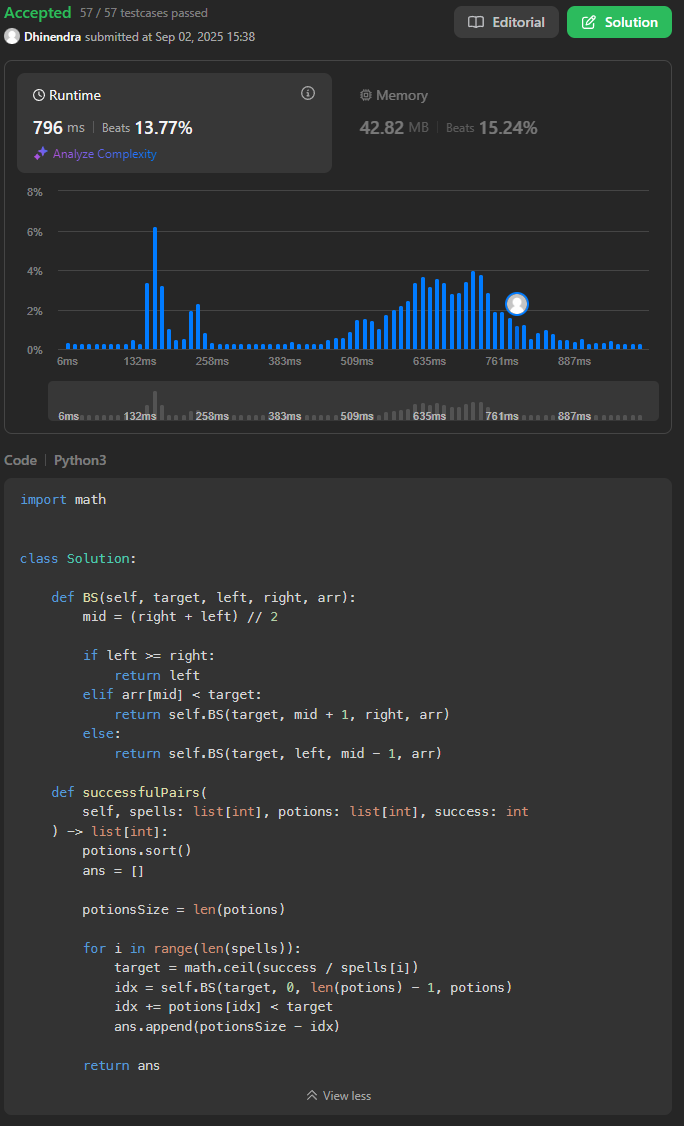

### Community References:


* Better approach we a few key optimizations:

```
class Solution:

    def BS(self, target, left, right, arr):
        while left <= right:
            mid = (right + left) // 2
            if arr[mid] < target:
                left = mid + 1
            else:
                right = mid - 1
        return left

    def successfulPairs(
        self, spells: list[int], potions: list[int], success: int
    ) -> list[int]:
        potions.sort()
        ans = []

        potionsSize = len(potions)

        for i in range(len(spells)):
            target = (success + spells[i] - 1) // spells[i]

            if target > potions[-1]:
                ans.append(0)
                continue
            idx = self.BS(target, 0, len(potions) - 1, potions)
            idx += potions[idx] < target
            ans.append(potionsSize - idx)

        return ans
```

* Here we calculate the target using (success + spells[i] - 1) // spells[i]. Avoiding the use of math.ceil
* We exit early if there is no posibility of a solution
* Changed Binary search to run using while loop so stack memory is not used and only 2 pointers are.
* Same complexity but very different performance.



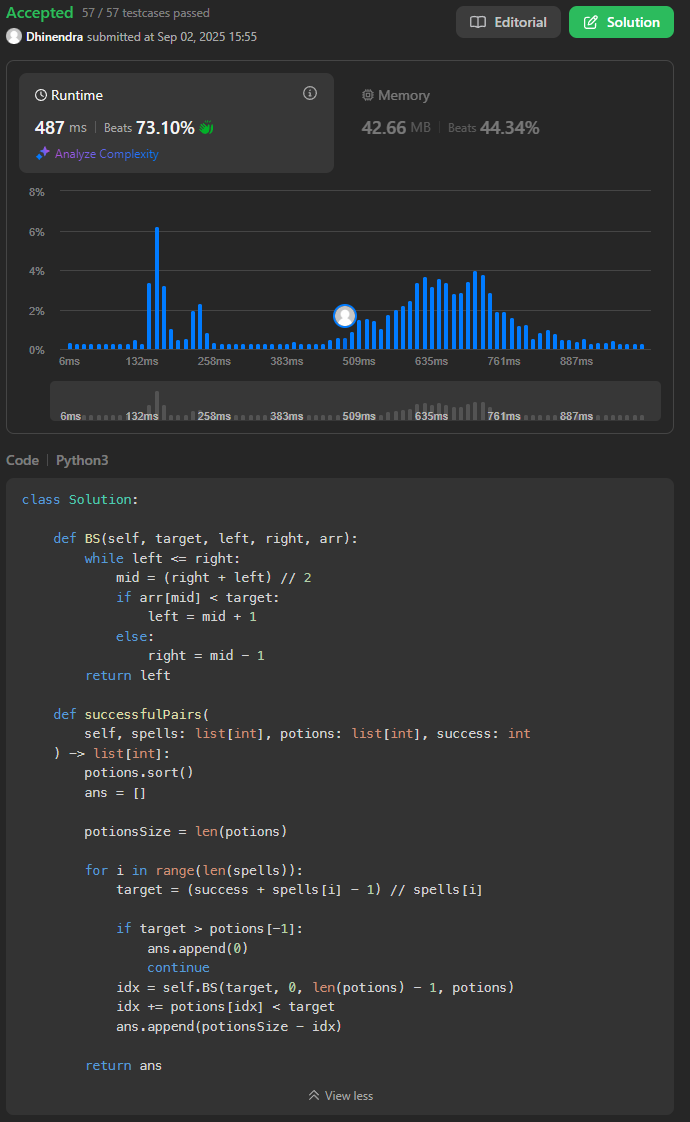


### Complexity:

***Time***:O( (p+s) * log(p) )

* P being the potions and S being the spells.

* Sorting potions creates plog(p)
* Querying potions using binary search gives us s * log(p) 

***Space***: O(s)

* Where s is the number of spells as we keep our answer in an array of size S